<a href="https://colab.research.google.com/github/ProteintechLab/Statistics/blob/main/qpcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
download.file("https://raw.githubusercontent.com/ProteintechLab/Statistics/main/QPCR.csv", "qpcr.csv")

In [3]:
%%R
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
%%R
qpcr<-read_csv("qpcr.csv")

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Group
dbl (3): HouseKeepr, Gene1, Gene2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
%%R
qpcr<-qpcr%>%mutate(Gene1dCT=Gene1-HouseKeepr, Gene2dCT=Gene2-HouseKeepr)
qpcr

# A tibble: 12 × 6
   HouseKeepr Gene1 Gene2 Group Gene1dCT Gene2dCT
        <dbl> <dbl> <dbl> <chr>    <dbl>    <dbl>
 1       21.2  29.9  23.5 KO        8.77    2.34 
 2       20.1  25.0  22.2 WT        4.89    2.11 
 3       20.3  30.0  21.3 WT        9.64    0.941
 4       20.2  25.4  20.4 WT        5.17    0.212
 5       23.2  30.4  23.5 KO        7.14    0.252
 6       20.3  24.7  21.2 WT        4.41    0.886
 7       19.9  24.9  20.6 WT        5.02    0.716
 8       20.3  29.9  21.2 KO        9.67    0.910
 9       21.3  25.6  22.1 WT        4.23    0.714
10       20.8  29.9  21.8 KO        9.17    1.08 
11       20.7  30.4  21.6 KO        9.77    0.890
12       21.4  25.7  23.0 WT        4.25    1.61 


In [6]:
%%R
Gene1con<-as.numeric(qpcr[2,5])
Gene2con<-as.numeric(qpcr[2,6])

In [7]:
%%R
Gene1con

[1] 4.887


In [8]:
%%R
qpcr<-qpcr%>%mutate(Gene1ddCT=Gene1dCT-Gene1con, Gene2ddCT=Gene2dCT-Gene2con)
qpcr

# A tibble: 12 × 8
   HouseKeepr Gene1 Gene2 Group Gene1dCT Gene2dCT Gene1ddCT Gene2ddCT
        <dbl> <dbl> <dbl> <chr>    <dbl>    <dbl>     <dbl>     <dbl>
 1       21.2  29.9  23.5 KO        8.77    2.34      3.89      0.231
 2       20.1  25.0  22.2 WT        4.89    2.11      0         0    
 3       20.3  30.0  21.3 WT        9.64    0.941     4.75     -1.17 
 4       20.2  25.4  20.4 WT        5.17    0.212     0.286    -1.90 
 5       23.2  30.4  23.5 KO        7.14    0.252     2.25     -1.86 
 6       20.3  24.7  21.2 WT        4.41    0.886    -0.476    -1.22 
 7       19.9  24.9  20.6 WT        5.02    0.716     0.131    -1.39 
 8       20.3  29.9  21.2 KO        9.67    0.910     4.79     -1.20 
 9       21.3  25.6  22.1 WT        4.23    0.714    -0.662    -1.39 
10       20.8  29.9  21.8 KO        9.17    1.08      4.28     -1.03 
11       20.7  30.4  21.6 KO        9.77    0.890     4.88     -1.22 
12       21.4  25.7  23.0 WT        4.25    1.61     -0.639    -0.497


In [9]:
%%R
qpcr<-qpcr%>%mutate(Gene1RQ=2^(-Gene1ddCT), Gene2RQ=2^(-Gene2ddCT))
qpcr

# A tibble: 12 × 10
   HouseKeepr Gene1 Gene2 Group Gene1dCT Gene2dCT Gene1ddCT Gene2ddCT Gene1RQ
        <dbl> <dbl> <dbl> <chr>    <dbl>    <dbl>     <dbl>     <dbl>   <dbl>
 1       21.2  29.9  23.5 KO        8.77    2.34      3.89      0.231  0.0676
 2       20.1  25.0  22.2 WT        4.89    2.11      0         0      1     
 3       20.3  30.0  21.3 WT        9.64    0.941     4.75     -1.17   0.0370
 4       20.2  25.4  20.4 WT        5.17    0.212     0.286    -1.90   0.820 
 5       23.2  30.4  23.5 KO        7.14    0.252     2.25     -1.86   0.210 
 6       20.3  24.7  21.2 WT        4.41    0.886    -0.476    -1.22   1.39  
 7       19.9  24.9  20.6 WT        5.02    0.716     0.131    -1.39   0.913 
 8       20.3  29.9  21.2 KO        9.67    0.910     4.79     -1.20   0.0362
 9       21.3  25.6  22.1 WT        4.23    0.714    -0.662    -1.39   1.58  
10       20.8  29.9  21.8 KO        9.17    1.08      4.28     -1.03   0.0515
11       20.7  30.4  21.6 KO        9.77    

In [10]:
%%R
qpcr$Group<-factor(qpcr$Group, levels=c("WT", "KO"))
qpcr

# A tibble: 12 × 10
   HouseKeepr Gene1 Gene2 Group Gene1dCT Gene2dCT Gene1ddCT Gene2ddCT Gene1RQ
        <dbl> <dbl> <dbl> <fct>    <dbl>    <dbl>     <dbl>     <dbl>   <dbl>
 1       21.2  29.9  23.5 KO        8.77    2.34      3.89      0.231  0.0676
 2       20.1  25.0  22.2 WT        4.89    2.11      0         0      1     
 3       20.3  30.0  21.3 WT        9.64    0.941     4.75     -1.17   0.0370
 4       20.2  25.4  20.4 WT        5.17    0.212     0.286    -1.90   0.820 
 5       23.2  30.4  23.5 KO        7.14    0.252     2.25     -1.86   0.210 
 6       20.3  24.7  21.2 WT        4.41    0.886    -0.476    -1.22   1.39  
 7       19.9  24.9  20.6 WT        5.02    0.716     0.131    -1.39   0.913 
 8       20.3  29.9  21.2 KO        9.67    0.910     4.79     -1.20   0.0362
 9       21.3  25.6  22.1 WT        4.23    0.714    -0.662    -1.39   1.58  
10       20.8  29.9  21.8 KO        9.17    1.08      4.28     -1.03   0.0515
11       20.7  30.4  21.6 KO        9.77    

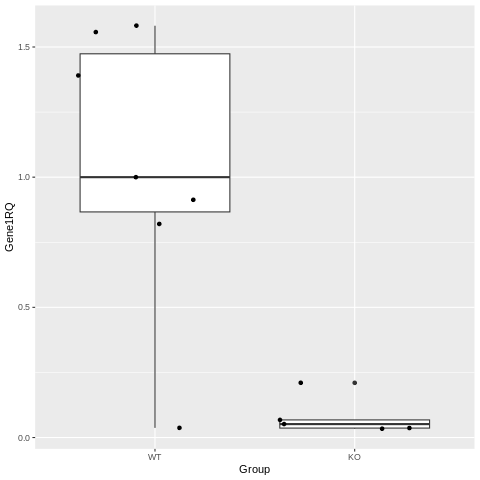

In [11]:
%%R
qpcr%>%ggplot(aes(Group, Gene1RQ))+geom_boxplot()+geom_jitter()

In [12]:
%%R
wilcox.test(Gene1RQ ~ Group, data = qpcr, exact = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Gene1RQ by Group
W = 32, p-value = 0.02299
alternative hypothesis: true location shift is not equal to 0

